In [11]:
from openeye.oechem import *
from openeye.oedepict import *
import oenotebook as oenb
from IPython.display import display
import os
smile = "ccc"
file = "./Mol5k.ism"

#### Makes an index file, and depicts the substructures with highlights

In [12]:
def MainSubstructure(file, smile):
    ifs = oemolistream()
    if not ifs.open(file):
        print("Cannot open target input file!")
        return
    if not smile:
        print("Please input query in smile format")
        return
    qmol = OEGraphMol()
    OEParseSmiles(qmol, smile)
    print ("The query molecule:")
    display(oenb.draw_mol(qmol))
    width = 400.0
    height = 400.0
    opts = OE2DMolDisplayOptions(width, height, OEScale_AutoScale)
    image = OEImage(width, height)
    colors = OEGetContrastColors()
    ss = OESubSearch(smile)
    mollist = []
    for mol in ifs.GetOEGraphMols():
        mollist.append(OEGraphMol(mol))
        OEPrepareSearch(mol, ss)
    DepictMoleculesWithSubstructureMatches(image, mollist,opts,colors, smile)
    CreateMolDatabaseIndexFile(file)

def CreateMolDatabaseIndexFile(file):
    idxfname = OEGetMolDatabaseIdxFileName(file)
    if os.path.exists(idxfname):
        OEThrow.Warning("%s index file already exists" % idxfname)
    elif not OECreateMolDatabaseIdx(file):
        OEThrow.Warning("Unable to create " + str(idxfname) + "molecule index file")

def DepictMoleculesWithSubstructureMatches(image, mollist, opts, colors, smile):

    highlight = OEHighlightOverlayByBallAndStick(colors)
    borderpen = OEPen(OEWhite, OELightGrey, OEFill_Off, 1.0)
    count = 0
    ss = OESubSearch(smile)
    for mol in mollist:
        if ss.Match(mol, True):
            count = count + 1
            OEPrepareDepiction(mol)
            disp = OE2DMolDisplay(mol, opts)
            OEAddHighlightOverlay(disp, highlight, ss.Match(mol, True))
            OERenderMolecule(image, disp)
            OEDrawBorder(image, borderpen)
            display(oenb.draw_oeimage(image))
    print("The number of matching molecules is: "+ str(count))
    nomatch = (len(mollist) - count)
    print("The number of nonmatching molecules is: "+ str(nomatch))

In [6]:
#calling the function without the widget
#MainSubstructure(file, smile)

In [13]:
#calling the function with the widget
from IPython.html import widgets
from ipywidgets import interactive
from IPython.display import Image, HTML, display

The query molecule:


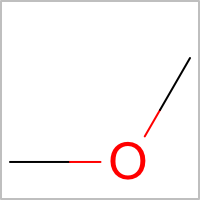

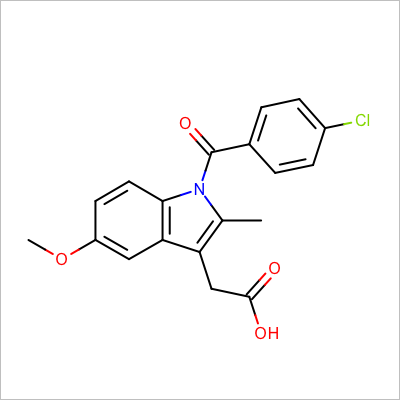

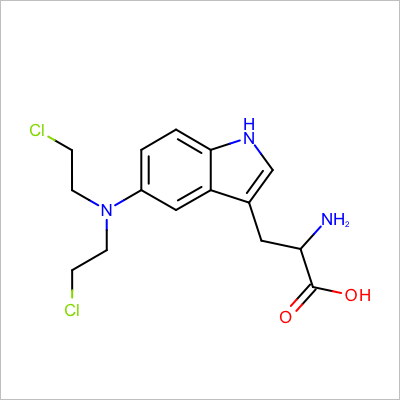

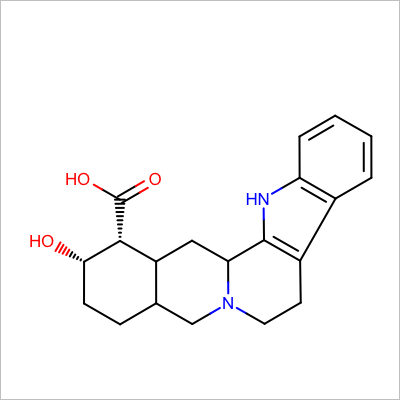

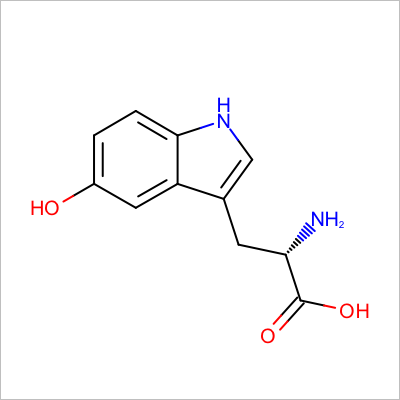

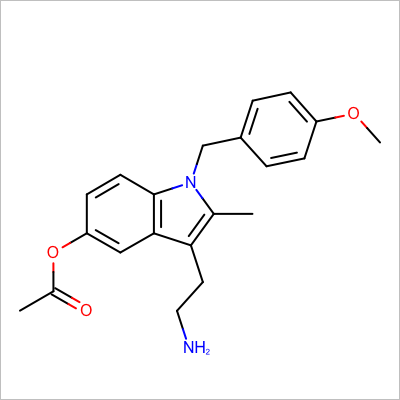

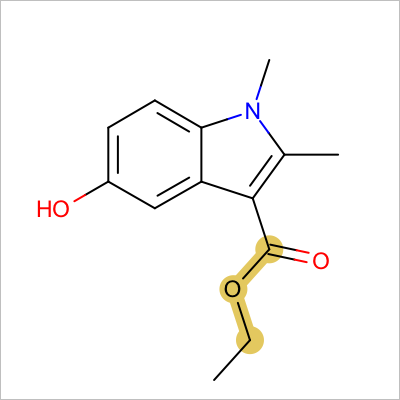

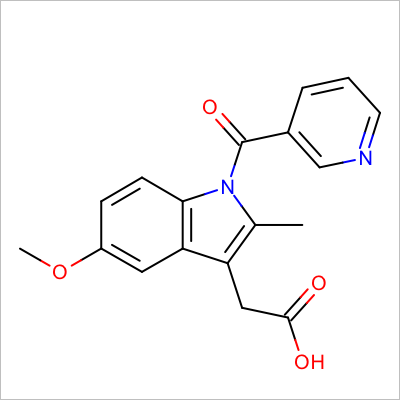

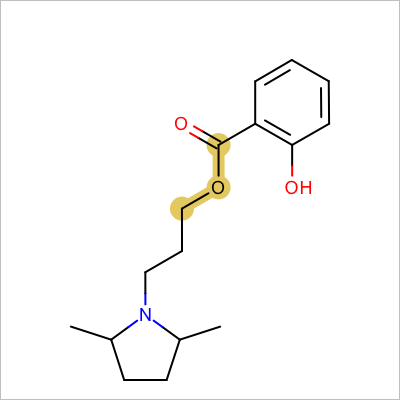

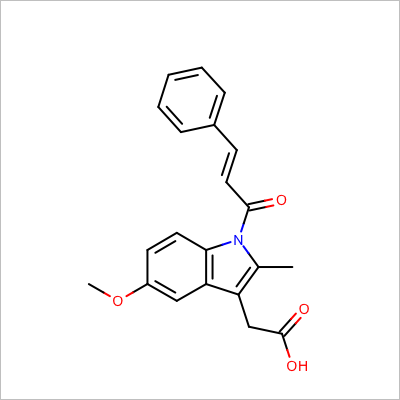

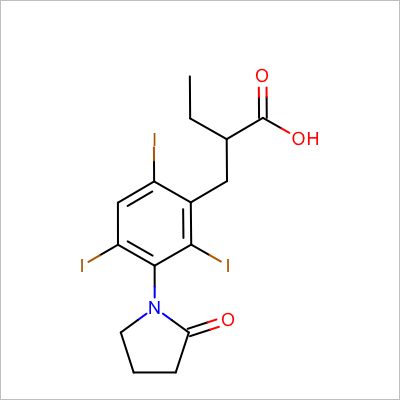

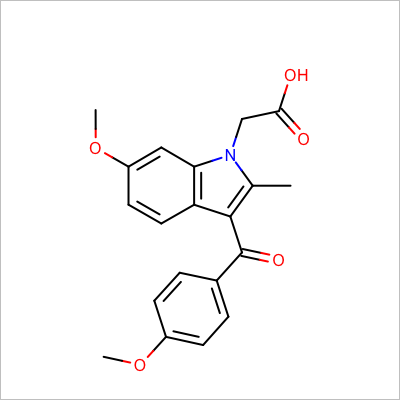

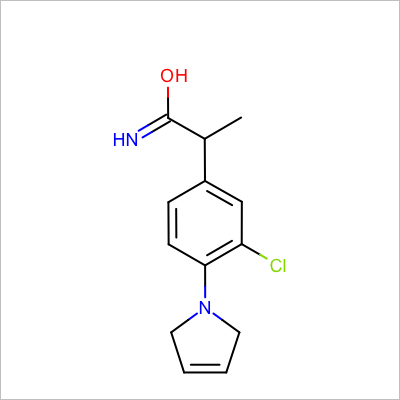

The number of matching molecules is: 12
The number of nonmatching molecules is: 0


In [17]:
w = interactive(MainSubstructure, file = widgets.Text(), smile = widgets.Text())
display(w)